# Least Squares
> How to fit a nonlinear function to data

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

<img src="python_figures/least-squares.png" alt="least squares" width="600">

## Introduction

This code produces the figure above. It's main tool is the `curve_fit` method, that allows us to fit any function to data, and get optimal parameter values.

## The code

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import scipy.special
from scipy.optimize import curve_fit
import matplotlib.patches as patches

Make graph look pretty

In [2]:
%%capture out
%matplotlib notebook
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
# this is a latex constant, don't change it.
pts_per_inch = 72.27
# write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
text_width_in_pts = 300.0
# inside a figure environment in latex, the result will be on the
# dvi/pdf next to the figure. See url above.
text_width_in_inches = text_width_in_pts / pts_per_inch
# make rectangles with a nice proportion
golden_ratio = 0.618
# figure.png or figure.eps will be intentionally larger, because it is prettier
inverse_latex_scale = 2
# when compiling latex code, use
# \includegraphics[scale=(1/inverse_latex_scale)]{figure}
# we want the figure to occupy 2/3 (for example) of the text width
fig_proportion = (3.0 / 3.0)
csize = inverse_latex_scale * fig_proportion * text_width_in_inches
# always 1.0 on the first argument
fig_size = (1.0 * csize, 0.85 * csize)
# find out the fontsize of your latex text, and put it here
text_size = inverse_latex_scale * 12
label_size = inverse_latex_scale * 10
tick_size = inverse_latex_scale * 8
# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {#'backend': 'ps',
          'axes.labelsize': 16,
          'legend.fontsize': tick_size,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'axes.labelsize': label_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family': 'serif',
          'font.size': text_size,
#           'font.serif': ['Computer Modern Roman'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          'figure.figsize': fig_size,
          # include here any neede package for latex
          'text.latex.preamble': [r'\usepackage{amsmath}'],
          }
plt.rcParams.update(params)
plt.clf()
fig = plt.figure(1, figsize=fig_size)  # figsize accepts only inches.
fig.subplots_adjust(left=0.04, right=0.98, top=0.93, bottom=0.15,
                    hspace=0.05, wspace=0.02)
plt.ioff()

Configure axes and some function definitions

In [3]:
x = np.arange(0, 12, 0.4)
ax1 = fig.add_subplot(211, aspect='equal')
ax2 = fig.add_subplot(212, aspect='equal')
ax1.set_xlim((x.min(), x.max()))
ax2.set_xlim((x.min(), x.max()))
ax1.set_ylim(-1, 3.5)
ax2.set_ylim(-1, 3.5)
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(-1, 4))
ax2.set_yticks(np.arange(-1, 4))

def func(x, par0, par1, par2):
    return par0 + np.cos(par1 * x + par2)


def add_rec(ax, c, v, col):
    ax.add_patch(
        patches.Rectangle(
            c,          # (x,y)
            np.abs(v),  # width
            v,          # height
            alpha=0.4,
            color=col
        )
    )

Now let's plot some stuff

<IPython.core.display.Javascript object>


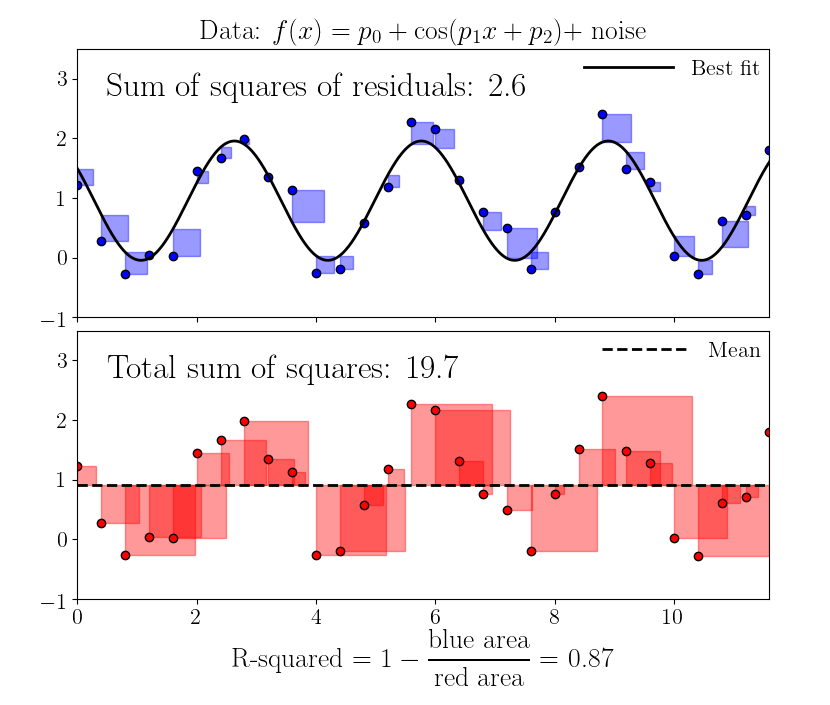

In [4]:
%matplotlib notebook
# the parameter values
par = (1, 2, 1)
# generating data with noise
y = func(x, *par) + (np.random.random(len(x)) - 0.5)
ax1.plot(x, y, marker='o', ls='None', markerfacecolor="blue", markeredgecolor="black")
ax2.plot(x, y, marker='o', ls='None', markerfacecolor="red", markeredgecolor="black")

# best fit
popt, pcov = curve_fit(func, x, y, p0=(1.5, 1.5, 2.5))  # p0 = initial guess
p0, p1, p2 = popt
# The total sum of squares (proportional to the variance of the data)
SStot = ((y - y.mean()) ** 2).sum()
# The sum of squares of residuals
SSres = ((y - func(x, p0, p1, p2)) ** 2).sum()
Rsquared = 1 - SSres / SStot
# plot best fit
h = np.linspace(x.min(), x.max(), 1001)
fit, = ax1.plot(h, func(h, p0, p1, p2), color='black', linewidth=2)
ax1.legend([fit], ["Best fit"], loc="upper right",
           frameon=False, handlelength=4)
# plot mean
mean, = ax2.plot(h, h * 0 + np.mean(y), ls='--', color='black', linewidth=2)
ax2.legend([mean], ["Mean"], loc="upper right", frameon=False, handlelength=4)

# plot blue and red squares
for ind in np.arange(len(x)):
    x0 = x[ind]
    y0 = y[ind]
    # print(x0,y0)
    v1 = y0 - func(x0, p0, p1, p2)
    v2 = y0 - y.mean()
    add_rec(ax1, (x0, y0), -v1, "blue")
    add_rec(ax2, (x0, y0), -v2, "red")

ax2.text(0.5, 2.7, r"Total sum of squares: {:.1f}".format(SStot))
ax1.text(0.5, 2.7, r"Sum of squares of residuals: {:.1f}".format(SSres))
ax2.set_xlabel(
         r"R-squared = $1 - \displaystyle\frac{\text{blue area}}{\text{red area}}$ = " +
         "{:.2f}".format(Rsquared))
ax1.set_xlabel(
         r"Data: $f(x) = p_0 + \cos(p_1 x + p_2)+ $ noise ")
ax1.xaxis.set_label_position("top")
fig.savefig("./python_figures/least-squares.png",dpi=300)
fig